## New dataset for airline ratings etc

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud,STOPWORDS
import nltk
import re
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.classify import SklearnClassifier
from nltk.stem import PorterStemmer

In [2]:
filename = "airline.csv"
df_rating = pd.read_csv(filename)
df_rating.airline_name.str.replace('(egyptair)', 'egypt-air')
df_rating.head()

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
0,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy,NaN,7.0,4.0,4.0,4.0,0.0,NaN,NaN,4.0,1
1,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Ron Kuhlmann,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,NaN,NaN,Business Class,NaN,10.0,4.0,5.0,4.0,1.0,NaN,NaN,5.0,1
2,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,E Albin,Switzerland,2014-09-14,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,NaN,NaN,Economy,NaN,9.0,5.0,5.0,4.0,0.0,NaN,NaN,5.0,1
3,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Tercon Bojan,Singapore,2014-09-06,Adria serves this 100 min flight from Ljubljan...,NaN,NaN,Business Class,NaN,8.0,4.0,4.0,3.0,1.0,NaN,NaN,4.0,1
4,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,L James,Poland,2014-06-16,WAW-SKJ Economy. No free snacks or drinks on t...,NaN,NaN,Economy,NaN,4.0,4.0,2.0,1.0,2.0,NaN,NaN,2.0,0


## Sort sentiment into Positiv and Negativ

In [3]:

#Indeler sentiment værdi ud fra overall_rating
#Positiv - Negativ - (Neutral)
NaN = float("NaN")
neutral_range = {"low": 2, "high": 8}
df_rating["sentiment"] = NaN
df_rating["sentiment"].loc[df_rating["overall_rating"] <= neutral_range["low"]] = "negative"
df_rating["sentiment"].loc[df_rating["overall_rating"] >= neutral_range["high"]] = "positive"
df_rating.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,...,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended,sentiment
0,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy,...,7.0,4.0,4.0,4.0,0.0,NaN,NaN,4.0,1,NaN
1,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Ron Kuhlmann,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,NaN,NaN,Business Class,...,10.0,4.0,5.0,4.0,1.0,NaN,NaN,5.0,1,positive
2,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,E Albin,Switzerland,2014-09-14,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,NaN,NaN,Economy,...,9.0,5.0,5.0,4.0,0.0,NaN,NaN,5.0,1,positive
3,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Tercon Bojan,Singapore,2014-09-06,Adria serves this 100 min flight from Ljubljan...,NaN,NaN,Business Class,...,8.0,4.0,4.0,3.0,1.0,NaN,NaN,4.0,1,positive
4,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,L James,Poland,2014-06-16,WAW-SKJ Economy. No free snacks or drinks on t...,NaN,NaN,Economy,...,4.0,4.0,2.0,1.0,2.0,NaN,NaN,2.0,0,NaN


In [4]:
#Tjekker længden af "content" og tilføjer en extra row med det 
df_rating['length'] = df_rating['content'].apply(len)
df_rating.head(1)

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,...,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended,sentiment,length
0,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy,...,4.0,4.0,4.0,0.0,NaN,NaN,4.0,1,NaN,424


## Compare length of  content with overall rating

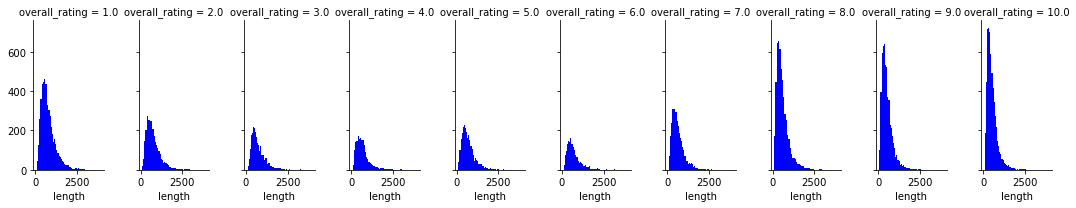

In [5]:
#Sammenligner textlængden af "content" med overall_rating
graph = sns.FacetGrid(data=df_rating,col='overall_rating', aspect= 0.5)
graph.map(plt.hist,'length',bins=50,color='blue')

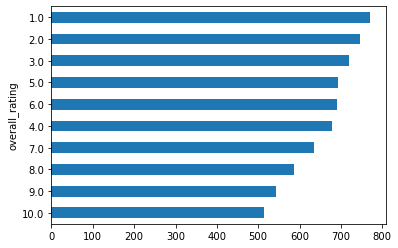

In [6]:
##Viser overall_rating ud fra længden af content gennemsnit
df_rating.groupby('overall_rating')['length'].mean().sort_values(ascending=True).plot(kind='barh')

## Wordcloud representation from positive and negative words

In [7]:
#X_train, X_validation, y_train, y_validation = train_test_split(df["content"], df["sentiment"], test_size=0.2, stratify=df["sentiment"])

filename = df_rating[['content', 'sentiment']]

# splitter dataset til train og et test dataset
train, test = train_test_split(filename,test_size = 0.1)

train_pos = train[train['sentiment'] == 'positive']
train_pos = train_pos['content']
train_neg = train[train['sentiment'] == 'negative']
train_neg = train_neg['content']


Positive words


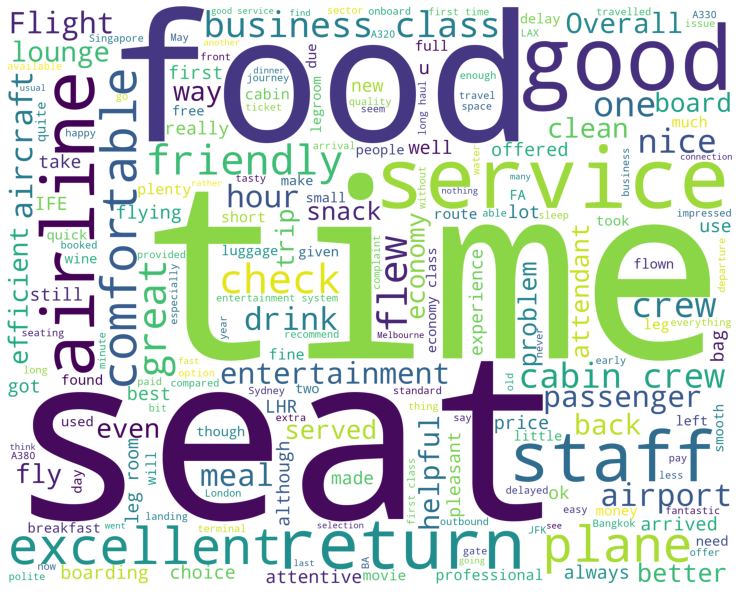

Negative words


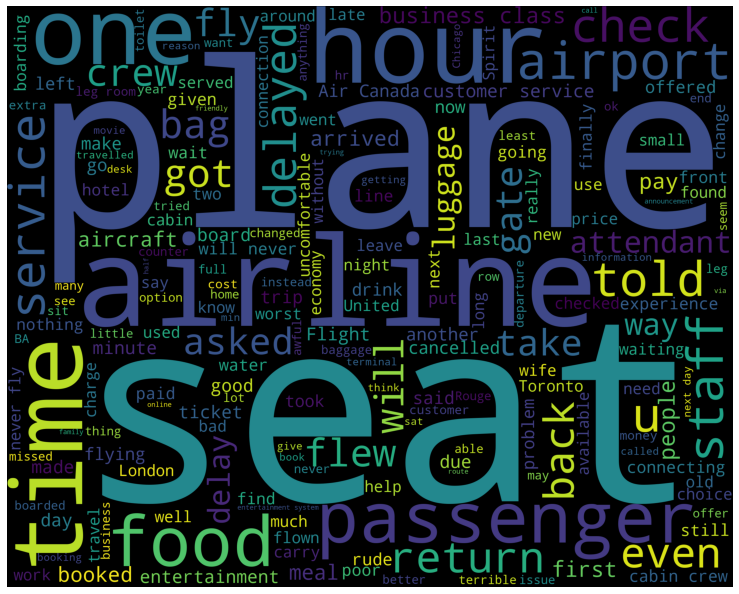

In [8]:


def wordcloud_draw(filename, color = 'black'):
    words = ' '.join(filename)
    cleaned_word = " ".join([word for word in words.split()
                            if 'flight' not in word
                                and not word.startswith('jfk')
                            ])
    wordcloud = WordCloud(
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

## Insert the average rating for each airline company

In [9]:
#Find gennemsnit af rating for de forskellige selskaber
gennemsnit = df_rating.groupby('airline_name')['overall_rating'].mean().apply(float).to_dict()
gennemsnit
gennemsnit['lufthansa']

6.993333333333333

## Cleaning content column

In [10]:
df_rating = df_rating.dropna(subset=['overall_rating'])
df_rating = df_rating.dropna(subset=['sentiment'])

label = LabelEncoder()
df_rating['sentiment'] = label.fit_transform(df_rating['sentiment'])

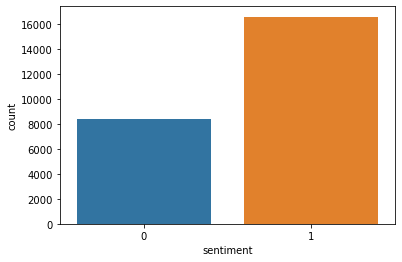

In [11]:
#Fordeling af positive og negative kommenatrer
#negativ = 0, positiv = 1
#df_rating['sentiment'].value_counts()

sns.countplot(df_rating['sentiment'])

#### Getting the words root form

In [12]:
#Remove all special and numeric character from data and also remove stopwards an apply stemming
#nltk.download('omw-1.4')
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('stopwords')

ps = PorterStemmer()


stop_words = stopwords.words('english')
#print(stop_words)
lemmatizer=WordNetLemmatizer()
for index,row in df_rating.iterrows():
    filter_sentence = []
    sentence = row['content'].lower()
    sentence = re.sub("[^a-zA-Z]"," ", sentence)#cleaning
    words = nltk.word_tokenize(sentence)#tokenization
    words = [w for w in words if not w in stop_words] #stopwords removal
    for word in words:
        filter_sentence.append(lemmatizer.lemmatize(word))
    
    filter_sentence = " ".join(filter_sentence)
    df_rating.loc[index,'filtered content'] = filter_sentence
    
    

1    two short hop zrh lju lju vie fast crj seat co...
Name: filtered content, dtype: object
 
 
1    Two short hops ZRH-LJU and LJU-VIE. Very fast ...
Name: content, dtype: object


In [25]:
with pd.option_context('max_colwidth', 800) :
    print (df_rating['content'][:1])
    print (df_rating['filtered content'][:1])


1    Two short hops ZRH-LJU and LJU-VIE. Very fast on CRJ 90. Seats comfortable and crew was fine. Ground services good and lounge was quite nice.
Name: content, dtype: object
1    two short hop zrh lju lju vie fast crj seat comfortable crew fine ground service good lounge quite nice
Name: filtered content, dtype: object


## New machine learning model

In [14]:
from sklearn.model_selection import train_test_split
Independent_var = df_rating['filtered content']
Dependent_var = df_rating['sentiment']
IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 225)
print('IV_train : ' , len(IV_train))
print('IV_test : ' , len(IV_test))
print('DV_train : ' , len(DV_train))
print('DV_test : ' , len(DV_test))

IV_train :  22489
IV_test :  2499
DV_train :  22489
DV_test :  2499


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
tvec = TfidfVectorizer()
clf2 = LogisticRegression( solver = 'lbfgs')
from sklearn.pipeline import Pipeline

In [16]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(IV_train, DV_train)
from sklearn.metrics import confusion_matrix
predictions = model.predict(IV_test)
confusion_matrix(predictions, DV_test)

array([[ 785,   34],
       [  76, 1604]])

## Model predictions

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.9559823929571829
Precision :  0.9571170557028313
Recall :  0.9559823929571829


In [18]:
example = ['I am satisfied']
example1 = ['A real disappointment']
result = model.predict(example)
print(result)

[1]


## Saving model for later use

In [19]:
pd.DataFrame(np.c_[DV_test, predictions] , columns=["Acutal" , "Predicted"])

,Acutal,Predicted
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
2494,1,1
2495,1,1
2496,0,0
2497,1,1


In [19]:
#import pandas as pd 
#vec = TfidfVectorizer()
#text_db = df_rating['content'].head(20)
#tf_idf =  vec.fit_transform(text_db)
#print(pd.DataFrame(tf_idf.toarray(), columns=vec.get_feature_names()))

In [20]:
positive_content = df_rating[df_rating['sentiment'] == 1]['filtered content']
positive_content = positive_content.values.tolist()

negative_content = df_rating[df_rating['sentiment'] == 0]['filtered content']
negative_content = negative_content.values.tolist()
negative_content[:2]


['athens cairo service bland erratic uncomfortable thin seat food inedible minuscule quantity gate agent checking visa requirement minute real disappointment',
 'flown week doubt left clearly low cost airline nothing free even water plane poor condition different seat even announcement programmed different indicates non homogated fleet flight attendant poor attitude towards passenger']

## Positive ratings

In [21]:
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
text_db = positive_content
tf_idf =  vec.fit_transform(text_db)
words_df = pd.DataFrame(tf_idf.toarray(), columns=vec.get_feature_names())

In [22]:
words_df.mean().sort_values(ascending=False).head(20)


flight         0.060740
good           0.037594
seat           0.035005
time           0.031671
service        0.031524
food           0.027882
crew           0.026882
airline        0.024273
staff          0.023569
cabin          0.023201
class          0.022857
excellent      0.022230
great          0.021855
friendly       0.021545
comfortable    0.020823
return         0.020529
business       0.019555
plane          0.019029
flew           0.018334
would          0.017909
dtype: float64

### Negative ratings

In [23]:
vec = TfidfVectorizer()
text_db = negative_content
tf_idf =  vec.fit_transform(text_db)
#print(vec.get_feature_names())
words_df = pd.DataFrame(tf_idf.toarray(), columns=vec.get_feature_names())
words_df.mean().sort_values(ascending=False).head(20)

flight       0.066945
seat         0.039922
hour         0.034214
airline      0.029665
time         0.026538
plane        0.026394
service      0.025911
staff        0.021568
one          0.020894
would        0.020814
food         0.020730
get          0.019621
delayed      0.019618
passenger    0.019422
air          0.018597
airport      0.018532
fly          0.018200
crew         0.018011
back         0.017748
never        0.017450
dtype: float64

### Getting lists of positive and negative words

In [24]:
positive_words_file = 'positive_words.txt'
negative_words_file = 'negative_words.txt'
def readFile(fileName):
        fileObj = open(fileName, "r") #opens the file in read mode
        words = fileObj.read().splitlines() #puts the file into an array
        fileObj.close()
        return words
positive_words = readFile(positive_words_file)
negative_words = readFile(negative_words_file)


In [25]:
#how many times does the positive words appear in the positive review content column?
# Python program to find the k most frequent words
# from data set
from collections import Counter

# using list comprehension
positiveListToStr = ' '.join([str(elem) for elem in positive_content])
negativeListToStr = ' '.join([str(elem) for elem in negative_content])

# returns list of all the words in the string
positive_split_it = positiveListToStr.split()
negative_split_it = negativeListToStr.split()

  
# Pass the split_it list to instance of Counter class.
positive_Counter = Counter(positive_split_it)
negative_Counter = Counter(negative_split_it)
  
# finds the 1000 most common words into a list of tuples
positive_most_occur = positive_Counter.most_common(1000)
negative_most_occur = negative_Counter.most_common(1000)

  
print(positive_most_occur[:5])
print(negative_most_occur[:5])

[('flight', 29752), ('seat', 12973), ('good', 12333), ('time', 10583), ('service', 10347)]
[('flight', 20747), ('seat', 8143), ('hour', 7011), ('airline', 5646), ('time', 5148)]


In [26]:

positive_dict_list = []
negative_dict_list = []

for index, tuple in enumerate(positive_most_occur):
    element_one = tuple[0]
    element_two = tuple[1]
    if element_one in positive_words:
        my_dict = {element_one: element_two}
        positive_dict_list.append(my_dict)
        
for index, tuple in enumerate(negative_most_occur):
    element_one = tuple[0]
    element_two = tuple[1]
    if element_one in negative_words:
        my_dict = {element_one: element_two}
        negative_dict_list.append(my_dict)
        
print(negative_dict_list[:5])
print(positive_dict_list[:5])
    

[{'delayed': 2659}, {'delay': 1884}, {'poor': 1426}, {'problem': 1144}, {'worst': 1126}]
[{'good': 12333}, {'excellent': 5345}, {'friendly': 5215}, {'comfortable': 5132}, {'great': 5036}]


### Visualizing data

<BarContainer object of 6 artists>

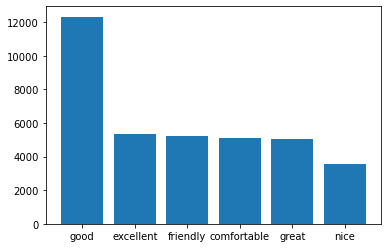

In [27]:
#Positive
#flatten out array
positive_res = {}
for item in positive_dict_list:
    positive_res.update(item)

positive_keys = [key for key in positive_res.keys()]
positive_values = [value for value in positive_res.values()]
plt.bar(positive_keys[:6], positive_values[:6])

<BarContainer object of 6 artists>

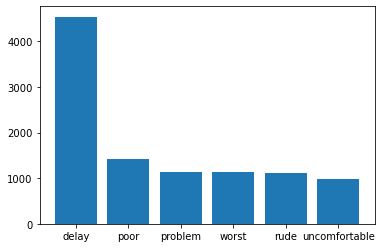

In [28]:
#Negative
#flatten out array
negative_res = {}
for item in negative_dict_list:
    negative_res.update(item)

#delayed is not in its root form and should be --> delay
delay_sum = negative_res.get('delayed') + negative_res.get('delay')
new_delay_dict = {"delay":delay_sum}
negative_res.update(new_delay_dict)
negative_res.pop('delayed')

negative_keys = [key for key in negative_res.keys()]
negative_values = [value for value in negative_res.values()]

plt.bar(negative_keys[:6], negative_values[:6])